# <span style="color:darkblue"> Lecture 25 - Advanced Plots 1  </span>

<font size = "5">

In this lecture we will work on the aesthetics of graphs

- How to set custom themes
- Change different aspects of the layout

# <span style="color:darkblue"> I. Setup working environment  </span>

<font size = "5">

Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from   matplotlib import style
from   matplotlib import ticker
import matplotlib.dates as mdates

<font size = "5">
Import data and parse columns

In [2]:
portfolios         = pd.read_csv("data_raw/portfolios.csv")
portfolios["date"] = pd.to_datetime(portfolios["date_str"])

<font size = "5">

Figure Style

- Colors, design and layout
- With ```plt.style.use()``` set the style for all future figures

https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [3]:
# Check which styles are available
display(plt.style.available)

# Set the style. Can switch back by setting:    plt.style.use('default')
# Changing the style also works with "plt" regardless of whether you
# use the subplots environment or not.

plt.style.use('seaborn')


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

/var/folders/ry/z4l42bk13rz37dkk_lqznmg40000gn/T/ipykernel_41357/847978535.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# <span style="color:darkblue"> II. Subplots  </span>

<font size = "5">

Subplot + Exporting

<font size = "3">

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

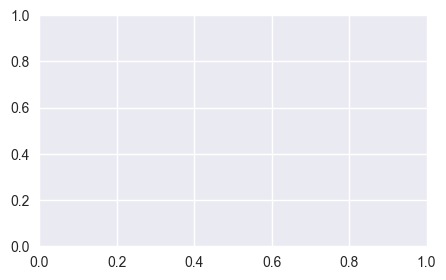

In [4]:

# Create an empty layout with 1 row x 1 column
# "figsize" takes a  list with the width and height
# To add elements write "ax." + plotting options
# Check the link above link for more general syntax with more rows or columns

fig, ax = plt.subplots(1,1,figsize = [5,3])
#------ code
#------ code
#------ code

# Save figure in the subfolder "results" in "png" format
fig.savefig('results/blank_figure.png')


<font size = "5">

Subplots + Lines

Text(0.5, 1.0, 'Portfolio performance over time')

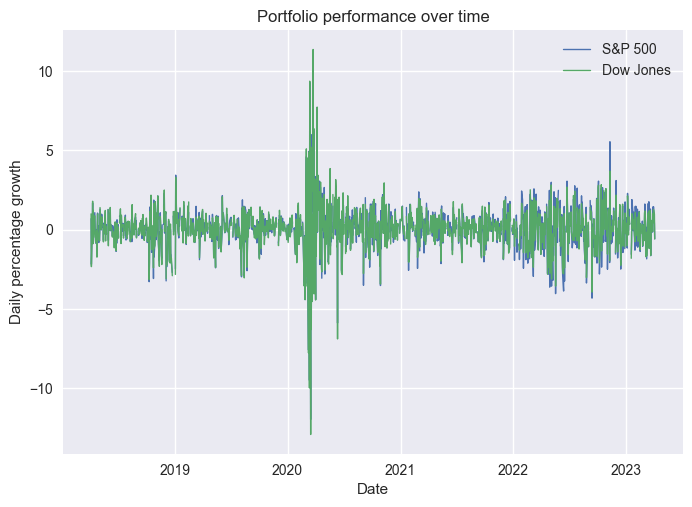

In [5]:
# Extract information that we want to plot
# Indicate that "date" is the x-axis
plot_data = portfolios[["date","growth_sp500","growth_djia"]].set_index("date")

# Generate basic lineplot 
# We add with the subplot environment and add more info
fig, ax = plt.subplots(1,1)
ax.plot(plot_data,
        linewidth=1)
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date")
ax.set_title("Portfolio performance over time")


<font size = "5">

Subplots + Histograms

Text(0.5, 1.0, 'Histogram of portfolio growth')

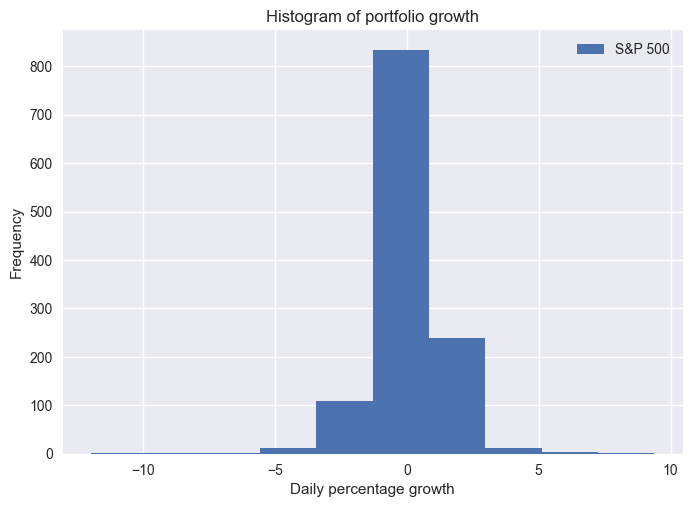

In [6]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.hist(x = portfolios["growth_sp500"])
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Frequency")
ax.set_xlabel("Daily percentage growth")
ax.set_title("Histogram of portfolio growth")

<font size = "5">

Try it yourself!

- Set a style! (choose your favorite one from the list)
- Copy-paste the code for the histogram
- Save the histogram to a file "histogram_example.png" in the <br>
subfolder "results" using ```.savefig()```

In [7]:
# Write your own code




<font size = "5">

Try it yourself!

- Create a scatter plot of "growth_sp500" (y-axis) and <br>
"growth_djia" (x-axis) using the subplots environment.
- Label the axes and the title.

HINT: Write ``` ax.scatter(...) ```


Text(0.5, 1.0, 'Scatterplot of portfolio growth')

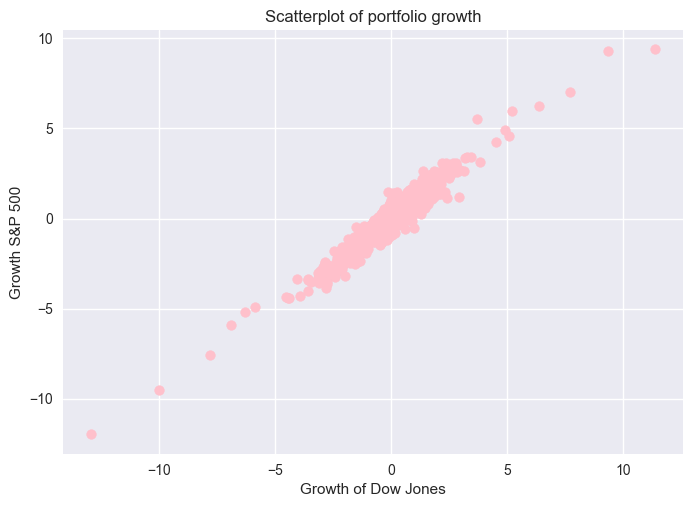

In [8]:
# Write your own code

fig, ax = plt.subplots(1,1)
ax.scatter(x = portfolios["growth_djia"], y = portfolios["growth_sp500"],
           color = "pink")
ax.set_ylabel("Growth S&P 500")
ax.set_xlabel("Growth of Dow Jones")
ax.set_title("Scatterplot of portfolio growth")





# <span style="color:darkblue"> III. Customizing Layout  </span>

<font size = "5">

Formatting ticks (labels on axes)


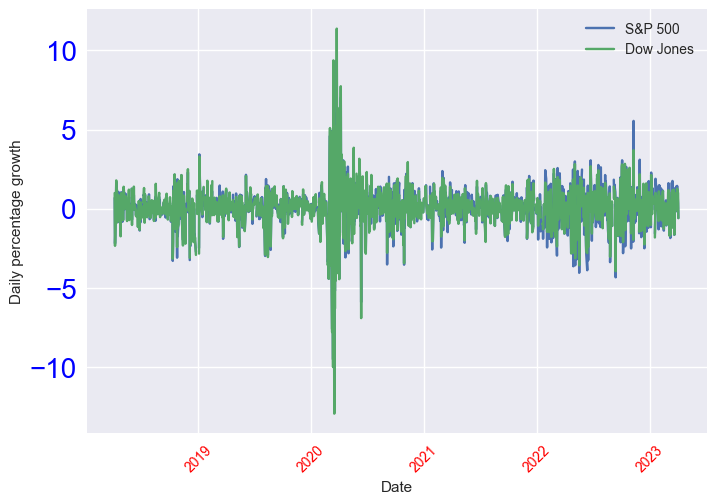

In [9]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.plot(portfolios[["date","growth_sp500","growth_djia"]].set_index("date"))
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date")

# Change format of ticks
ax.xaxis.set_tick_params(labelsize = 10,
                         rotation=45,
                         colors = "red")
ax.yaxis.set_tick_params(labelsize = 20,
                         rotation=0,
                         colors = "blue")


<font size = "5">

Formatting numeric axes

$\qquad$ <img src="figures/wildcard_floats.png" alt="drawing" width="300"/>

(-20.0, 20.0)

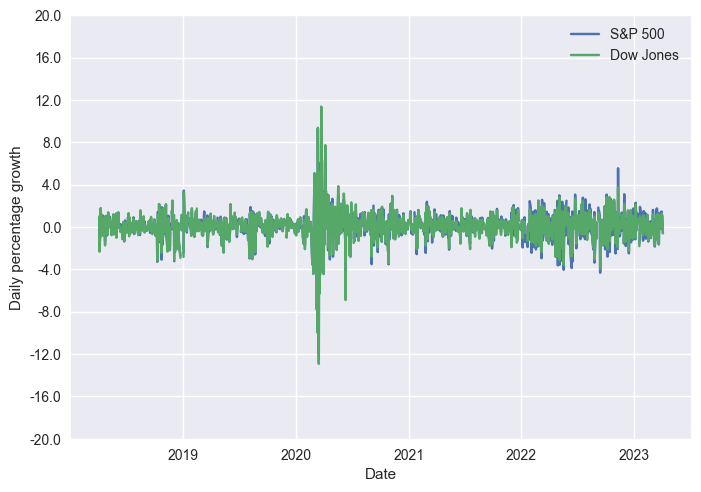

In [10]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.plot(portfolios[["date","growth_sp500","growth_djia"]].set_index("date"))
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date")

# Set number of ticks, configure them, and display them
M = 10
config_ticks = ticker.MaxNLocator(M)
format_ticks = ticker.FormatStrFormatter('%.1f')
ax.yaxis.set_major_locator(config_ticks)
ax.yaxis.set_major_formatter(format_ticks)

# Set graph limits manually.
ax.set_ylim(-20,20)


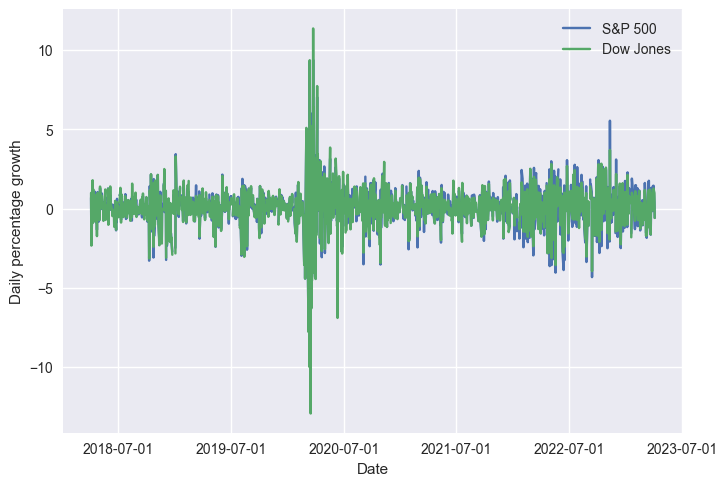

In [11]:
# Baseline plot
fig, ax = plt.subplots(1,1)
ax.plot(portfolios[["date","growth_sp500","growth_djia"]].set_index("date"))
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Daily percentage growth")
ax.set_xlabel("Date")

# Establish the frequency of labels and their format
# Can also use "DayLocator","MonthLocator", "YearLocator", 
# Use wildcards to set the year format: See lecture on time data

config_ticks   = mdates.MonthLocator(interval=12)
format_ticks = mdates.DateFormatter('%Y-%m-%d')  
ax.xaxis.set_major_locator(config_ticks)
ax.xaxis.set_major_formatter(format_ticks)


<font size = "5">

Try it yourself!

- Copy-paste the code for the histogram above
- Read the example in "Formatting numeric axes"
- Change the formatting of the x-axis as follows <br>
(a) Include 20 tick lables, rotated at 45 degrees <br>
(b) increase the padding with set_xlabel(..., labelpad =15)


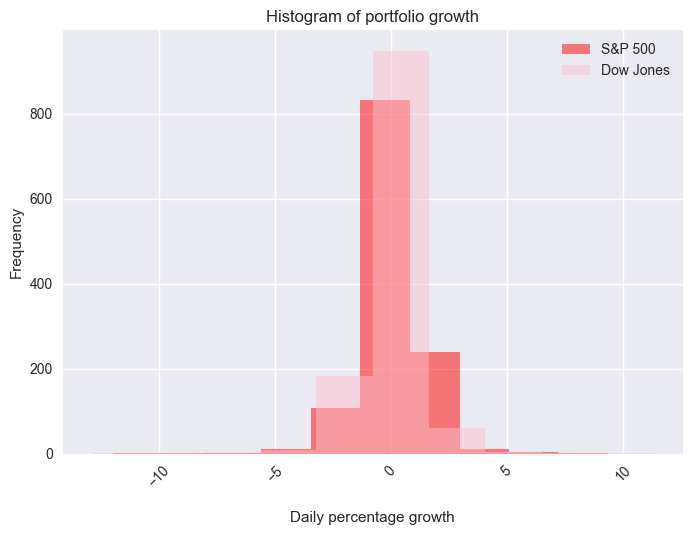

In [17]:
# Write your own code


fig, ax = plt.subplots(1,1)
ax.hist(x = portfolios["growth_sp500"], color = "red", alpha = 0.5)
ax.hist(x = portfolios["growth_djia"], color = "pink", alpha = 0.5)
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Frequency")
ax.set_xlabel("Daily percentage growth",
              labelpad = 15)
ax.set_title("Histogram of portfolio growth")
ax.xaxis.set_tick_params(labelsize = 10, rotation = 45)



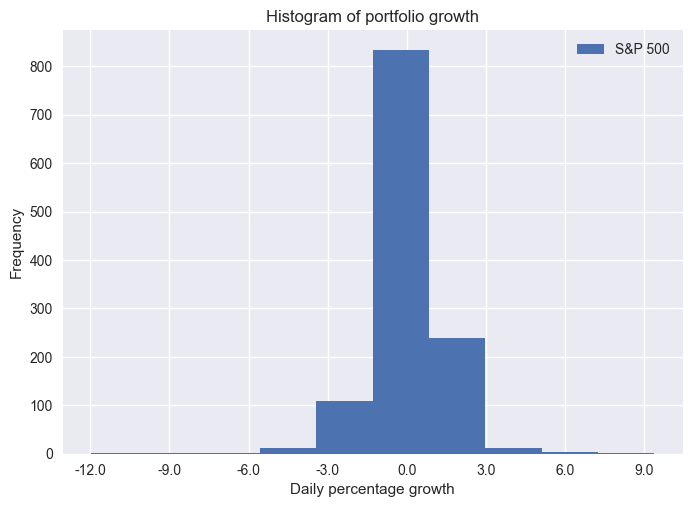

In [21]:
## copy and paste histogram code -- read the example in formating numeric axes -- include 8 ticks on the x-axis displaying 1 decimal place

fig, ax = plt.subplots(1,1)
ax.hist(x = portfolios["growth_sp500"])
ax.legend(["S&P 500","Dow Jones"])
ax.set_ylabel("Frequency")
ax.set_xlabel("Daily percentage growth")
ax.set_title("Histogram of portfolio growth")

# Set number of ticks, configure them, and display them
M = 8
config_ticks = ticker.MaxNLocator(M)
format_ticks = ticker.FormatStrFormatter('%.1f')
ax.xaxis.set_major_locator(config_ticks)
ax.xaxis.set_major_formatter(format_ticks)



# <span style="color:darkblue"> IV. (Optional) More resources  </span>

<font size = "5">

Anatomy of a figure

Soure + more details: https://matplotlib.org/stable/gallery/showcase/anatomy.html


<img src="figures/structure_plot.png" alt="drawing" width="550"/>

<font size = "5">

More options

https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.05-Multi-Line-Plots/